<a href="https://colab.research.google.com/github/khan1652/AI/blob/main/ML_2%EC%B0%A8%EC%8B%9C_%ED%9A%8C%EA%B7%80(%EC%A4%91%EA%B3%A0%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 및 데이터

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# csv파일 불러오기
# index_col 은 인덱스를 몇번째 칼럼으로 지정할건지
df = pd.read_csv('/content/hyundi_preprocessed.csv', index_col=0)

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0


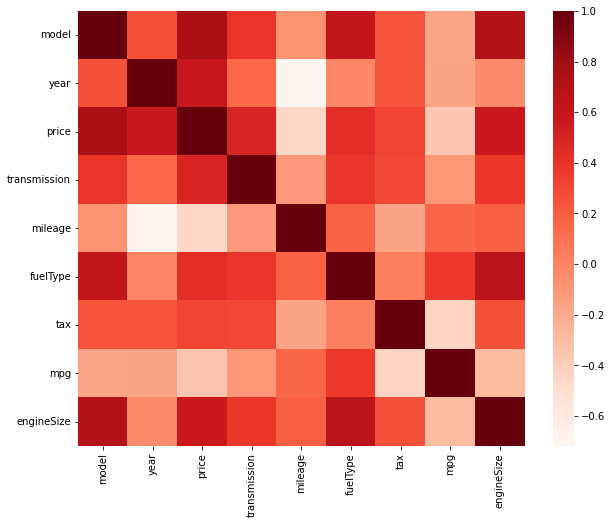

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.263101,0.750079,0.390303,-0.071479,0.620555,0.243590,-0.169773,0.705748
year,0.263101,1.000000,0.579491,0.141673,-0.718346,-0.013514,0.247107,-0.165499,-0.039711
price,0.750079,0.579491,1.000000,0.491467,-0.446682,0.435426,0.313535,-0.351620,0.569788
transmission,0.390303,0.141673,0.491467,1.000000,-0.106616,0.384796,0.295471,-0.096696,0.381954
mileage,-0.071479,-0.718346,-0.446682,-0.106616,1.000000,0.178882,-0.164643,0.157284,0.191388
fuelType,0.620555,-0.013514,0.435426,0.384796,0.178882,1.000000,0.027022,0.366631,0.672672
tax,0.243590,0.247107,0.313535,0.295471,-0.164643,0.027022,1.000000,-0.425274,0.258367
mpg,-0.169773,-0.165499,-0.351620,-0.096696,0.157284,0.366631,-0.425274,1.000000,-0.288521
engineSize,0.705748,-0.039711,0.569788,0.381954,0.191388,0.672672,0.258367,-0.288521,1.000000


In [ ]:
# 상관관계 시각화
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
corr

plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Reds')
plt.show()
corr

### tip 선형회귀의 전제
https://kkokkilkon.tistory.com/175

선형회귀 시 총 4가지의 전제가 존재한다.
1. 선형성
2. 독립성
3. 등분산성
4. 정규성

이 4가지 조건을 만족하지 못한다면 유의미한 분석 결과가 나오지 못할 수 있다. 독립성은 독립변수끼리의 독립적인 관계여야 한다는 점이다. 그러나 중고차 데이터는 독립변수별 연관성을 지니고 있기에 상황에 따라 어떤 변수를 모델 예측에 사용할지 고려해야 한다.

# 2. 학습 준비(x, y값 준비)

주어진 데이터에서 모든 칼럼에 대해 정규화 진행하기

In [ ]:
list(df.columns)

['model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [ ]:
SCA_COL = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Scaler = MinMaxScaler()
# Scaler = StandardScaler()

df[SCA_COL] = Scaler.fit_transform(df[SCA_COL])
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.466667,0.85,7999,0.000000,0.125407,0.000000,0.403226,0.611881,0.105263
1,0.800000,0.80,14499,0.666667,0.182842,0.666667,0.693548,0.306931,0.526316
2,0.800000,0.80,11399,0.000000,0.274466,0.666667,0.032258,0.667327,0.368421
3,0.333333,0.80,6499,0.000000,0.172378,0.000000,0.000000,0.635644,0.000000
4,0.400000,0.75,10199,0.000000,0.240408,0.666667,0.451613,0.463366,0.526316
...,...,...,...,...,...,...,...,...,...
4854,1.000000,0.95,29995,1.000000,0.011348,0.666667,0.403226,0.233663,0.631579
4856,0.600000,0.75,7830,0.000000,0.431213,0.666667,0.032258,0.746535,0.368421
4857,0.333333,0.85,6830,0.000000,0.100066,0.000000,0.000000,0.635644,0.000000
4858,0.800000,0.90,13994,0.000000,0.168929,0.000000,0.403226,0.332673,0.315789


In [ ]:
# 가격 데이터를 제외한 모든 칼럼이 모두 0~1사이로 정규화되었다
df.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000
mean,0.633145,0.857186,12840.655488,0.214503,0.153203,0.282520,0.338236,0.496606,0.248178
std,0.218228,0.095940,5907.108300,0.371594,0.125783,0.362290,0.176252,0.218139,0.200423
min,0.000000,0.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.800000,8200.000000,0.000000,0.060171,0.000000,0.338710,0.332673,0.105263
50%,0.666667,0.850000,12058.500000,0.000000,0.124403,0.000000,0.403226,0.542574,0.315789
75%,0.800000,0.950000,15795.000000,0.666667,0.221243,0.666667,0.403226,0.635644,0.368421
max,1.000000,1.000000,43995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_data = df['price']
x_data = df.drop(columns='price')

In [ ]:
y_data

0        7999
1       14499
2       11399
3        6499
4       10199
        ...  
4854    29995
4856     7830
4857     6830
4858    13994
4859    15999
Name: price, Length: 4592, dtype: int64

In [ ]:
x_data

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,0,17307,0,145.0,58.9,1.2
1,12,2016,2,25233,2,235.0,43.5,2.0
2,12,2016,0,37877,2,30.0,61.7,1.7
3,5,2016,0,23789,0,20.0,60.1,1.0
4,6,2015,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...
4854,15,2019,3,1567,2,145.0,39.8,2.2
4856,9,2015,0,59508,2,30.0,65.7,1.7
4857,5,2017,0,13810,0,20.0,60.1,1.0
4858,12,2018,0,23313,0,145.0,44.8,1.6


In [ ]:
# train_test split
# random_state로 랜덤한 값 고정
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

In [ ]:
# X, y 
len(X_train), len(X_test), len(y_train), len(y_test)

(3214, 1378, 3214, 1378)

# 3. 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_LR = modelLR.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
dfLR = pd.DataFrame({'선형회귀분석 r2_score':r2_score(y_test, y_pred_LR),
                    '선형회귀분석 MAE':mean_absolute_error(y_test, y_pred_LR),
                    '선형회귀분석 MSE':mean_squared_error(y_test, y_pred_LR),
                    '선형회귀분석 RMSE':mean_squared_error(y_test, y_pred_LR)**0.5,
                    '선형회귀분석 MAPE':mean_absolute_percentage_error(y_test, y_pred_LR),
                    }, index=['Linear Regression'])
dfLR

,선형회귀분석 r2_score,선형회귀분석 MAE,선형회귀분석 MSE,선형회귀분석 RMSE,선형회귀분석 MAPE
Linear Regression,0.856592,1557.424176,5.246828e+06,2290.595625,0.134413


r2_score: 0과 1사이의 값을 가지며 1에 가까울수록 선형회귀 모델이 데이터에 대해 높은 연관성 가짐

MSE: 평균제곱오차
MAE: 평균절대오차
RMSE: 평균제곱근오차
MAPE: 평균절대비오차

#### 결과 해석
R2 score가 85.6% 로 상당히 높은 결과값을 보이며, RMSE가 2290정도이므로 평균적으로 예측한 오차가 2290유로(300만원) 정도로 큰 편임을 알 수 있다. 아래의 boxplot을 통해서도 중앙값이 10000근처임을 보았을 때 2290유로는 큰 편임을 알 수 있다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


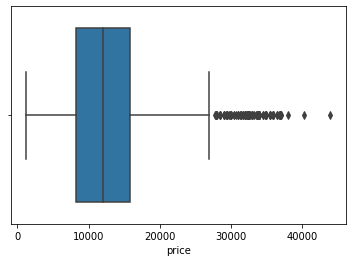

In [ ]:
sns.boxplot(df['price'])